In [1]:
# Importing standard packages for data exploration and processing.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [2]:
# We do not want most of the columns for this analysis.
columns = ['Profile', 'Season_id', 'Team_id', 'Match_id', 'Team', 'Home_team', 'Winner']

skaters_match = pd.read_csv('../data/skaters_match.csv', usecols=columns)
goalies_match = pd.read_csv('../data/goalies_match.csv', usecols=columns)

# Those columns are the same for both skaters and goalies.

players_match = skaters_match.append(goalies_match, ignore_index=True)
players_match.head(5)

,Profile,Season_id,Team_id,Match_id,Team,Home_team,Winner
0,https://en.khl.ru/players/16673/,244,54,6993,Amur,Barys,Barys
1,https://en.khl.ru/players/16673/,244,54,7869,Amur,Amur,Amur
2,https://en.khl.ru/players/16673/,244,54,9037,Amur,Amur,SKA
3,https://en.khl.ru/players/16673/,244,54,9701,Amur,Amur,Atlant
4,https://en.khl.ru/players/16673/,244,54,10343,Amur,Amur,Severstal


In [3]:
# We need to know whether a player has played for the home team and whether the home team has won.
players_match['Home'] = np.where(players_match['Team'] == players_match['Home_team'], 1, 0)
players_match['Win'] = np.where(players_match['Home_team'] == players_match['Winner'], 1, 0)
players_match.head()

,Profile,Season_id,Team_id,Match_id,Team,Home_team,Winner,Home,Win
0,https://en.khl.ru/players/16673/,244,54,6993,Amur,Barys,Barys,0,1
1,https://en.khl.ru/players/16673/,244,54,7869,Amur,Amur,Amur,1,1
2,https://en.khl.ru/players/16673/,244,54,9037,Amur,Amur,SKA,1,0
3,https://en.khl.ru/players/16673/,244,54,9701,Amur,Amur,Atlant,1,0
4,https://en.khl.ru/players/16673/,244,54,10343,Amur,Amur,Severstal,1,0


In [4]:
# We can use the match ID to turn the player-match level data into team-match level data.
wins = players_match[['Match_id', 'Win']].groupby('Match_id').max()
wins.head()

,Win
Match_id,
1,1
2,0
3,1
4,1
5,1


In [5]:
wins.describe()

,Win
count,10505.000000
mean,0.559448
std,0.496477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
# Some columns have already served their purpose and some need to be objects to get dummies.
players_match = players_match.drop(['Team', 'Home_team', 'Winner', 'Win'], axis=1)
list_objects = ['Season_id', 'Team_id', 'Match_id']
players_match[list_objects] = players_match[list_objects].astype('object')
players_match.head()

,Profile,Season_id,Team_id,Match_id,Home
0,https://en.khl.ru/players/16673/,244,54,6993,0
1,https://en.khl.ru/players/16673/,244,54,7869,1
2,https://en.khl.ru/players/16673/,244,54,9037,1
3,https://en.khl.ru/players/16673/,244,54,9701,1
4,https://en.khl.ru/players/16673/,244,54,10343,1


In [7]:
players_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422943 entries, 0 to 422942
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Profile    422943 non-null  object
 1   Season_id  422943 non-null  object
 2   Team_id    422943 non-null  object
 3   Match_id   422943 non-null  object
 4   Home       422943 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 14.5+ MB


In [8]:
# Careful not to get the match ID dummies.
# We are getting the dummies as floats so that we can have negative values for the dummies of the away team.
list_dummies = ['Season_id', 'Team_id', 'Profile']
players_dummies = pd.get_dummies(data=players_match, columns=list_dummies, dtype='float16')
players_dummies.head()

,Match_id,Home,Season_id_160,Season_id_165,Season_id_167,Season_id_168,Season_id_185,Season_id_186,Season_id_202,Season_id_203,Season_id_222,Season_id_223,Season_id_244,Season_id_245,Season_id_266,Season_id_267,Season_id_309,Season_id_310,Season_id_405,Season_id_406,Season_id_468,Season_id_472,Season_id_671,Season_id_674,Season_id_851,Season_id_854,Season_id_1045,Season_id_1046,Team_id_1,Team_id_2,Team_id_3,Team_id_6,Team_id_7,Team_id_19,Team_id_24,Team_id_25,Team_id_26,Team_id_29,Team_id_31,Team_id_34,Team_id_37,Team_id_38,Team_id_53,Team_id_54,Team_id_56,Team_id_66,Team_id_71,Team_id_84,Team_id_190,Team_id_198,...,Profile_https://en.khl.ru/players/6486/,Profile_https://en.khl.ru/players/6488/,Profile_https://en.khl.ru/players/6501/,Profile_https://en.khl.ru/players/6519/,Profile_https://en.khl.ru/players/7016/,Profile_https://en.khl.ru/players/7032/,Profile_https://en.khl.ru/players/7097/,Profile_https://en.khl.ru/players/7211/,Profile_https://en.khl.ru/players/7218/,Profile_https://en.khl.ru/players/725/,Profile_https://en.khl.ru/players/7255/,Profile_https://en.khl.ru/players/7267/,Profile_https://en.khl.ru/players/7268/,Profile_https://en.khl.ru/players/7274/,Profile_https://en.khl.ru/players/7277/,Profile_https://en.khl.ru/players/76/,Profile_https://en.khl.ru/players/7613/,Profile_https://en.khl.ru/players/7640/,Profile_https://en.khl.ru/players/8073/,Profile_https://en.khl.ru/players/82/,Profile_https://en.khl.ru/players/86/,Profile_https://en.khl.ru/players/88/,Profile_https://en.khl.ru/players/8821/,Profile_https://en.khl.ru/players/8875/,Profile_https://en.khl.ru/players/91/,Profile_https://en.khl.ru/players/9435/,Profile_https://en.khl.ru/players/9452/,Profile_https://en.khl.ru/players/9453/,Profile_https://en.khl.ru/players/9463/,Profile_https://en.khl.ru/players/9464/,Profile_https://en.khl.ru/players/9467/,Profile_https://en.khl.ru/players/9475/,Profile_https://en.khl.ru/players/9476/,Profile_https://en.khl.ru/players/9480/,Profile_https://en.khl.ru/players/9495/,Profile_https://en.khl.ru/players/98/,Profile_https://en.khl.ru/players/9811/,Profile_https://en.khl.ru/players/9830/,Profile_https://en.khl.ru/players/9833/,Profile_https://en.khl.ru/players/9840/,Profile_https://en.khl.ru/players/9843/,Profile_https://en.khl.ru/players/9849/,Profile_https://en.khl.ru/players/9851/,Profile_https://en.khl.ru/players/9853/,Profile_https://en.khl.ru/players/9857/,Profile_https://en.khl.ru/players/9859/,Profile_https://en.khl.ru/players/9860/,Profile_https://en.khl.ru/players/9862/,Profile_https://en.khl.ru/players/9863/,Profile_https://en.khl.ru/players/99/
0,6993,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7869,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9037,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9701,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

In [9]:
players_dummies.head()

,Match_id,Home,Season_id_160,Season_id_165,Season_id_167,Season_id_168,Season_id_185,Season_id_186,Season_id_202,Season_id_203,Season_id_222,Season_id_223,Season_id_244,Season_id_245,Season_id_266,Season_id_267,Season_id_309,Season_id_310,Season_id_405,Season_id_406,Season_id_468,Season_id_472,Season_id_671,Season_id_674,Season_id_851,Season_id_854,Season_id_1045,Season_id_1046,Team_id_1,Team_id_2,Team_id_3,Team_id_6,Team_id_7,Team_id_19,Team_id_24,Team_id_25,Team_id_26,Team_id_29,Team_id_31,Team_id_34,Team_id_37,Team_id_38,Team_id_53,Team_id_54,Team_id_56,Team_id_66,Team_id_71,Team_id_84,Team_id_190,Team_id_198,...,Profile_https://en.khl.ru/players/6486/,Profile_https://en.khl.ru/players/6488/,Profile_https://en.khl.ru/players/6501/,Profile_https://en.khl.ru/players/6519/,Profile_https://en.khl.ru/players/7016/,Profile_https://en.khl.ru/players/7032/,Profile_https://en.khl.ru/players/7097/,Profile_https://en.khl.ru/players/7211/,Profile_https://en.khl.ru/players/7218/,Profile_https://en.khl.ru/players/725/,Profile_https://en.khl.ru/players/7255/,Profile_https://en.khl.ru/players/7267/,Profile_https://en.khl.ru/players/7268/,Profile_https://en.khl.ru/players/7274/,Profile_https://en.khl.ru/players/7277/,Profile_https://en.khl.ru/players/76/,Profile_https://en.khl.ru/players/7613/,Profile_https://en.khl.ru/players/7640/,Profile_https://en.khl.ru/players/8073/,Profile_https://en.khl.ru/players/82/,Profile_https://en.khl.ru/players/86/,Profile_https://en.khl.ru/players/88/,Profile_https://en.khl.ru/players/8821/,Profile_https://en.khl.ru/players/8875/,Profile_https://en.khl.ru/players/91/,Profile_https://en.khl.ru/players/9435/,Profile_https://en.khl.ru/players/9452/,Profile_https://en.khl.ru/players/9453/,Profile_https://en.khl.ru/players/9463/,Profile_https://en.khl.ru/players/9464/,Profile_https://en.khl.ru/players/9467/,Profile_https://en.khl.ru/players/9475/,Profile_https://en.khl.ru/players/9476/,Profile_https://en.khl.ru/players/9480/,Profile_https://en.khl.ru/players/9495/,Profile_https://en.khl.ru/players/98/,Profile_https://en.khl.ru/players/9811/,Profile_https://en.khl.ru/players/9830/,Profile_https://en.khl.ru/players/9833/,Profile_https://en.khl.ru/players/9840/,Profile_https://en.khl.ru/players/9843/,Profile_https://en.khl.ru/players/9849/,Profile_https://en.khl.ru/players/9851/,Profile_https://en.khl.ru/players/9853/,Profile_https://en.khl.ru/players/9857/,Profile_https://en.khl.ru/players/9859/,Profile_https://en.khl.ru/players/9860/,Profile_https://en.khl.ru/players/9862/,Profile_https://en.khl.ru/players/9863/,Profile_https://en.khl.ru/players/99/
0,6993,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7869,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9037,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9701,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

In [10]:
# We could group by both match ID and whether a player belongs to the home team.
# However, it could be easier to substract the values of away dummies from the values of home dummies.
home_dummies = players_dummies[players_dummies['Home'] == 1].drop('Home', axis=1).copy()
away_dummies = players_dummies[players_dummies['Home'] == 0].drop('Home', axis=1).copy()
home_dummies.head()

,Match_id,Season_id_160,Season_id_165,Season_id_167,Season_id_168,Season_id_185,Season_id_186,Season_id_202,Season_id_203,Season_id_222,Season_id_223,Season_id_244,Season_id_245,Season_id_266,Season_id_267,Season_id_309,Season_id_310,Season_id_405,Season_id_406,Season_id_468,Season_id_472,Season_id_671,Season_id_674,Season_id_851,Season_id_854,Season_id_1045,Season_id_1046,Team_id_1,Team_id_2,Team_id_3,Team_id_6,Team_id_7,Team_id_19,Team_id_24,Team_id_25,Team_id_26,Team_id_29,Team_id_31,Team_id_34,Team_id_37,Team_id_38,Team_id_53,Team_id_54,Team_id_56,Team_id_66,Team_id_71,Team_id_84,Team_id_190,Team_id_198,Team_id_206,...,Profile_https://en.khl.ru/players/6486/,Profile_https://en.khl.ru/players/6488/,Profile_https://en.khl.ru/players/6501/,Profile_https://en.khl.ru/players/6519/,Profile_https://en.khl.ru/players/7016/,Profile_https://en.khl.ru/players/7032/,Profile_https://en.khl.ru/players/7097/,Profile_https://en.khl.ru/players/7211/,Profile_https://en.khl.ru/players/7218/,Profile_https://en.khl.ru/players/725/,Profile_https://en.khl.ru/players/7255/,Profile_https://en.khl.ru/players/7267/,Profile_https://en.khl.ru/players/7268/,Profile_https://en.khl.ru/players/7274/,Profile_https://en.khl.ru/players/7277/,Profile_https://en.khl.ru/players/76/,Profile_https://en.khl.ru/players/7613/,Profile_https://en.khl.ru/players/7640/,Profile_https://en.khl.ru/players/8073/,Profile_https://en.khl.ru/players/82/,Profile_https://en.khl.ru/players/86/,Profile_https://en.khl.ru/players/88/,Profile_https://en.khl.ru/players/8821/,Profile_https://en.khl.ru/players/8875/,Profile_https://en.khl.ru/players/91/,Profile_https://en.khl.ru/players/9435/,Profile_https://en.khl.ru/players/9452/,Profile_https://en.khl.ru/players/9453/,Profile_https://en.khl.ru/players/9463/,Profile_https://en.khl.ru/players/9464/,Profile_https://en.khl.ru/players/9467/,Profile_https://en.khl.ru/players/9475/,Profile_https://en.khl.ru/players/9476/,Profile_https://en.khl.ru/players/9480/,Profile_https://en.khl.ru/players/9495/,Profile_https://en.khl.ru/players/98/,Profile_https://en.khl.ru/players/9811/,Profile_https://en.khl.ru/players/9830/,Profile_https://en.khl.ru/players/9833/,Profile_https://en.khl.ru/players/9840/,Profile_https://en.khl.ru/players/9843/,Profile_https://en.khl.ru/players/9849/,Profile_https://en.khl.ru/players/9851/,Profile_https://en.khl.ru/players/9853/,Profile_https://en.khl.ru/players/9857/,Profile_https://en.khl.ru/players/9859/,Profile_https://en.khl.ru/players/9860/,Profile_https://en.khl.ru/players/9862/,Profile_https://en.khl.ru/players/9863/,Profile_https://en.khl.ru/players/99/
1,7869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [11]:
len(home_dummies)

211387

In [12]:
len(away_dummies)

211556

In [14]:
home_match = home_dummies.groupby('Match_id').max()
away_match = away_dummies.groupby('Match_id').max()
home_match.head()

,Season_id_160,Season_id_165,Season_id_167,Season_id_168,Season_id_185,Season_id_186,Season_id_202,Season_id_203,Season_id_222,Season_id_223,Season_id_244,Season_id_245,Season_id_266,Season_id_267,Season_id_309,Season_id_310,Season_id_405,Season_id_406,Season_id_468,Season_id_472,Season_id_671,Season_id_674,Season_id_851,Season_id_854,Season_id_1045,Season_id_1046,Team_id_1,Team_id_2,Team_id_3,Team_id_6,Team_id_7,Team_id_19,Team_id_24,Team_id_25,Team_id_26,Team_id_29,Team_id_31,Team_id_34,Team_id_37,Team_id_38,Team_id_53,Team_id_54,Team_id_56,Team_id_66,Team_id_71,Team_id_84,Team_id_190,Team_id_198,Team_id_206,Team_id_207,...,Profile_https://en.khl.ru/players/6486/,Profile_https://en.khl.ru/players/6488/,Profile_https://en.khl.ru/players/6501/,Profile_https://en.khl.ru/players/6519/,Profile_https://en.khl.ru/players/7016/,Profile_https://en.khl.ru/players/7032/,Profile_https://en.khl.ru/players/7097/,Profile_https://en.khl.ru/players/7211/,Profile_https://en.khl.ru/players/7218/,Profile_https://en.khl.ru/players/725/,Profile_https://en.khl.ru/players/7255/,Profile_https://en.khl.ru/players/7267/,Profile_https://en.khl.ru/players/7268/,Profile_https://en.khl.ru/players/7274/,Profile_https://en.khl.ru/players/7277/,Profile_https://en.khl.ru/players/76/,Profile_https://en.khl.ru/players/7613/,Profile_https://en.khl.ru/players/7640/,Profile_https://en.khl.ru/players/8073/,Profile_https://en.khl.ru/players/82/,Profile_https://en.khl.ru/players/86/,Profile_https://en.khl.ru/players/88/,Profile_https://en.khl.ru/players/8821/,Profile_https://en.khl.ru/players/8875/,Profile_https://en.khl.ru/players/91/,Profile_https://en.khl.ru/players/9435/,Profile_https://en.khl.ru/players/9452/,Profile_https://en.khl.ru/players/9453/,Profile_https://en.khl.ru/players/9463/,Profile_https://en.khl.ru/players/9464/,Profile_https://en.khl.ru/players/9467/,Profile_https://en.khl.ru/players/9475/,Profile_https://en.khl.ru/players/9476/,Profile_https://en.khl.ru/players/9480/,Profile_https://en.khl.ru/players/9495/,Profile_https://en.khl.ru/players/98/,Profile_https://en.khl.ru/players/9811/,Profile_https://en.khl.ru/players/9830/,Profile_https://en.khl.ru/players/9833/,Profile_https://en.khl.ru/players/9840/,Profile_https://en.khl.ru/players/9843/,Profile_https://en.khl.ru/players/9849/,Profile_https://en.khl.ru/players/9851/,Profile_https://en.khl.ru/players/9853/,Profile_https://en.khl.ru/players/9857/,Profile_https://en.khl.ru/players/9859/,Profile_https://en.khl.ru/players/9860/,Profile_https://en.khl.ru/players/9862/,Profile_https://en.khl.ru/players/9863/,Profile_https://en.khl.ru/players/99/
Match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0

In [18]:
# The season ID dummies should not be subtracted as that would turn all of them into zeros.
columns_diff = [col for col in home_match if not col.startswith('Season')]
match = home_match.copy()
match[columns_diff] = match[columns_diff] - away_match[columns_diff]

In [19]:
match.head()

,Season_id_160,Season_id_165,Season_id_167,Season_id_168,Season_id_185,Season_id_186,Season_id_202,Season_id_203,Season_id_222,Season_id_223,Season_id_244,Season_id_245,Season_id_266,Season_id_267,Season_id_309,Season_id_310,Season_id_405,Season_id_406,Season_id_468,Season_id_472,Season_id_671,Season_id_674,Season_id_851,Season_id_854,Season_id_1045,Season_id_1046,Team_id_1,Team_id_2,Team_id_3,Team_id_6,Team_id_7,Team_id_19,Team_id_24,Team_id_25,Team_id_26,Team_id_29,Team_id_31,Team_id_34,Team_id_37,Team_id_38,Team_id_53,Team_id_54,Team_id_56,Team_id_66,Team_id_71,Team_id_84,Team_id_190,Team_id_198,Team_id_206,Team_id_207,...,Profile_https://en.khl.ru/players/6486/,Profile_https://en.khl.ru/players/6488/,Profile_https://en.khl.ru/players/6501/,Profile_https://en.khl.ru/players/6519/,Profile_https://en.khl.ru/players/7016/,Profile_https://en.khl.ru/players/7032/,Profile_https://en.khl.ru/players/7097/,Profile_https://en.khl.ru/players/7211/,Profile_https://en.khl.ru/players/7218/,Profile_https://en.khl.ru/players/725/,Profile_https://en.khl.ru/players/7255/,Profile_https://en.khl.ru/players/7267/,Profile_https://en.khl.ru/players/7268/,Profile_https://en.khl.ru/players/7274/,Profile_https://en.khl.ru/players/7277/,Profile_https://en.khl.ru/players/76/,Profile_https://en.khl.ru/players/7613/,Profile_https://en.khl.ru/players/7640/,Profile_https://en.khl.ru/players/8073/,Profile_https://en.khl.ru/players/82/,Profile_https://en.khl.ru/players/86/,Profile_https://en.khl.ru/players/88/,Profile_https://en.khl.ru/players/8821/,Profile_https://en.khl.ru/players/8875/,Profile_https://en.khl.ru/players/91/,Profile_https://en.khl.ru/players/9435/,Profile_https://en.khl.ru/players/9452/,Profile_https://en.khl.ru/players/9453/,Profile_https://en.khl.ru/players/9463/,Profile_https://en.khl.ru/players/9464/,Profile_https://en.khl.ru/players/9467/,Profile_https://en.khl.ru/players/9475/,Profile_https://en.khl.ru/players/9476/,Profile_https://en.khl.ru/players/9480/,Profile_https://en.khl.ru/players/9495/,Profile_https://en.khl.ru/players/98/,Profile_https://en.khl.ru/players/9811/,Profile_https://en.khl.ru/players/9830/,Profile_https://en.khl.ru/players/9833/,Profile_https://en.khl.ru/players/9840/,Profile_https://en.khl.ru/players/9843/,Profile_https://en.khl.ru/players/9849/,Profile_https://en.khl.ru/players/9851/,Profile_https://en.khl.ru/players/9853/,Profile_https://en.khl.ru/players/9857/,Profile_https://en.khl.ru/players/9859/,Profile_https://en.khl.ru/players/9860/,Profile_https://en.khl.ru/players/9862/,Profile_https://en.khl.ru/players/9863/,Profile_https://en.khl.ru/players/99/
Match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

In [20]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10505 entries, 1 to 10505
Columns: 3231 entries, Season_id_160 to Profile_https://en.khl.ru/players/99/
dtypes: float16(3231)
memory usage: 64.8 MB


In [21]:
match.describe()

,Season_id_160,Season_id_165,Season_id_167,Season_id_168,Season_id_185,Season_id_186,Season_id_202,Season_id_203,Season_id_222,Season_id_223,Season_id_244,Season_id_245,Season_id_266,Season_id_267,Season_id_309,Season_id_310,Season_id_405,Season_id_406,Season_id_468,Season_id_472,Season_id_671,Season_id_674,Season_id_851,Season_id_854,Season_id_1045,Season_id_1046,Team_id_1,Team_id_2,Team_id_3,Team_id_6,Team_id_7,Team_id_19,Team_id_24,Team_id_25,Team_id_26,Team_id_29,Team_id_31,Team_id_34,Team_id_37,Team_id_38,Team_id_53,Team_id_54,Team_id_56,Team_id_66,Team_id_71,Team_id_84,Team_id_190,Team_id_198,Team_id_206,Team_id_207,...,Profile_https://en.khl.ru/players/6486/,Profile_https://en.khl.ru/players/6488/,Profile_https://en.khl.ru/players/6501/,Profile_https://en.khl.ru/players/6519/,Profile_https://en.khl.ru/players/7016/,Profile_https://en.khl.ru/players/7032/,Profile_https://en.khl.ru/players/7097/,Profile_https://en.khl.ru/players/7211/,Profile_https://en.khl.ru/players/7218/,Profile_https://en.khl.ru/players/725/,Profile_https://en.khl.ru/players/7255/,Profile_https://en.khl.ru/players/7267/,Profile_https://en.khl.ru/players/7268/,Profile_https://en.khl.ru/players/7274/,Profile_https://en.khl.ru/players/7277/,Profile_https://en.khl.ru/players/76/,Profile_https://en.khl.ru/players/7613/,Profile_https://en.khl.ru/players/7640/,Profile_https://en.khl.ru/players/8073/,Profile_https://en.khl.ru/players/82/,Profile_https://en.khl.ru/players/86/,Profile_https://en.khl.ru/players/88/,Profile_https://en.khl.ru/players/8821/,Profile_https://en.khl.ru/players/8875/,Profile_https://en.khl.ru/players/91/,Profile_https://en.khl.ru/players/9435/,Profile_https://en.khl.ru/players/9452/,Profile_https://en.khl.ru/players/9453/,Profile_https://en.khl.ru/players/9463/,Profile_https://en.khl.ru/players/9464/,Profile_https://en.khl.ru/players/9467/,Profile_https://en.khl.ru/players/9475/,Profile_https://en.khl.ru/players/9476/,Profile_https://en.khl.ru/players/9480/,Profile_https://en.khl.ru/players/9495/,Profile_https://en.khl.ru/players/98/,Profile_https://en.khl.ru/players/9811/,Profile_https://en.khl.ru/players/9830/,Profile_https://en.khl.ru/players/9833/,Profile_https://en.khl.ru/players/9840/,Profile_https://en.khl.ru/players/9843/,Profile_https://en.khl.ru/players/9849/,Profile_https://en.khl.ru/players/9851/,Profile_https://en.khl.ru/players/9853/,Profile_https://en.khl.ru/players/9857/,Profile_https://en.khl.ru/players/9859/,Profile_https://en.khl.ru/players/9860/,Profile_https://en.khl.ru/players/9862/,Profile_https://en.khl.ru/players/9863/,Profile_https://en.khl.ru/players/99/
count,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,...,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000
mean,0.063965,0.005806,0.063904,0.006855,0.059113,0.008186,0.059113,0.0

In [24]:
# Cleaning up the memory.
del columns, list_objects, list_dummies
del skaters_match, goalies_match,players_match, players_dummies, home_dummies,away_dummies, home_match, away_match 
import gc
gc.collect()

30

Let us play around with the resulting data a bit.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(match, wins.values.ravel(), test_size=0.2, random_state=42)

In [27]:
# Logistic regression has a big advantage of being able to calculate probabilities rather than just predict the outcome.
# After all, it is already common knowledge that a stronger team would be more likely to win than a weaker one.
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.46      0.53       963
           1       0.62      0.75      0.68      1138

    accuracy                           0.62      2101
   macro avg       0.62      0.61      0.60      2101
weighted avg       0.62      0.62      0.61      2101



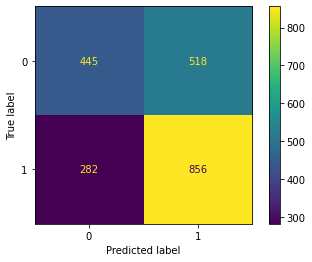

In [52]:
plot_confusion_matrix(model, X_test, y_test)

It is interesting how the model actually mislabeles the winning matches for the home team less often than expected, yet mislabeles the losing matches quite often. But again, the low accuracy was to be expected - after all, we are missing some key components. We only have one dummy variable per player, so they are expected to have a kind of average performance of that player over all his (potentially many) years of playing in KHL.

The easiest way to fix that would be adding an extra set of columns conditional on the player and the seasons ID. That would turn the player's performance into an average over a specific season and should significantly improve the model. We could also add the same kind of interractions between all other variables such as player-team and team-season.

Ideally, we would even want to create dummies for player-player interactions, capturing the synergy between them. However, that would create a number of features equal to the number of players to power of 2 (around 10 million) and even after dropping the all-null columns (since most of the players have probably only played with a few dozen or hundred players) it could still leave us in the ballpark of several hundred thousand features. Not only is such a model extremely prone to overfitting but it is also very computationally heavy.